In [1]:
import tensorflow
print(tensorflow.__version__)

1.15.2-dlenv_tfe


### Build MLP to classify Diabetes Patients using pima_diabetes dataset.

In [2]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
#selection of records to include in each data sub-dataset must be done randomly
random_seed = 7
np.random.seed(random_seed)

### Load the dataset: pima_diabetes.csv

In [5]:
# Load Data

filename = 'DATA/pima_diabetes.csv'

# Specify the fields with their names 
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
 
# Load the data into a Pandas DataFrame 
df = pd.read_csv(filename, names=col_names)

In [6]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Preprocess Dataset - Exploratory Data Analysis on Dataset

In [7]:
# count the number of NaN values in each column
print (df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [8]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns

print(df.shape)

(768, 9)


In [9]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [10]:
#return the first five records / rows of the data set
print(df.head(5))

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [11]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [12]:
#class distribution i.e. how many records are in each class
print(df.groupby('class').size())

class
0    500
1    268
dtype: int64


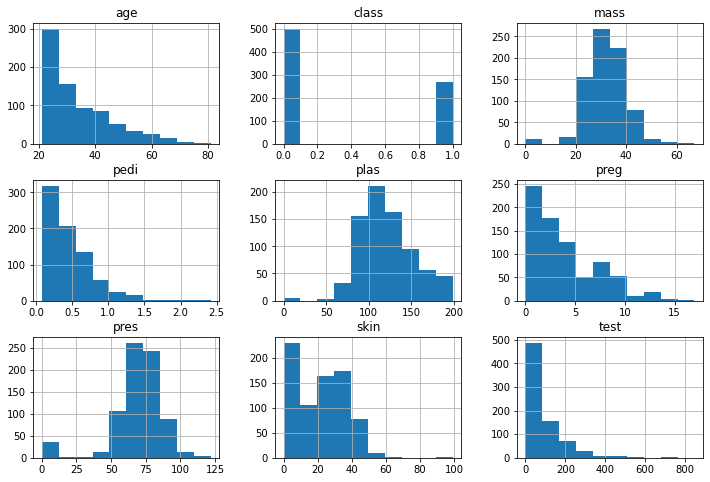

In [13]:
# plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
plt.show()

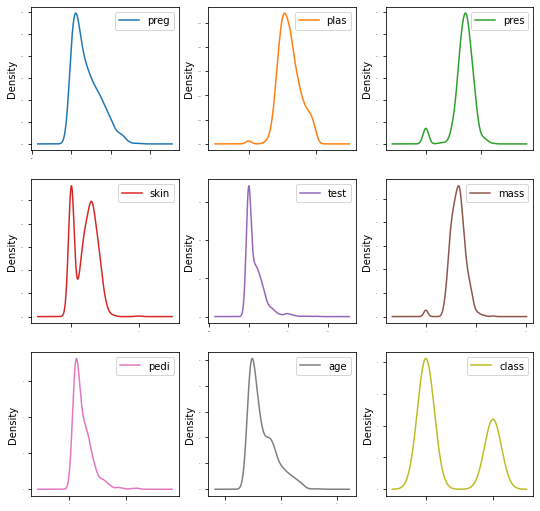

In [14]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1, figsize=(9, 9))
plt.show()

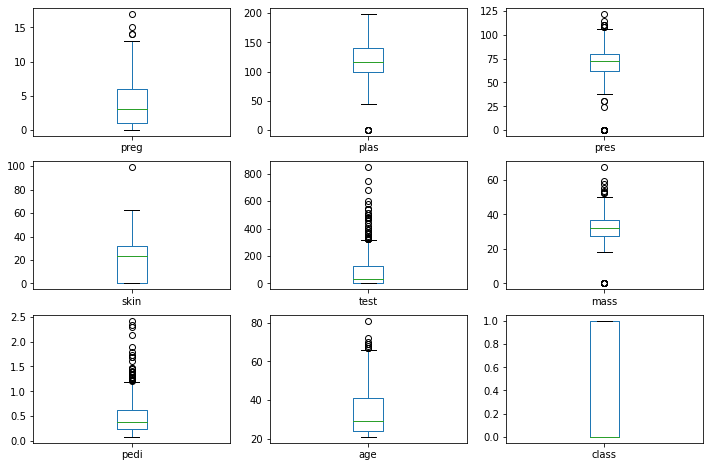

In [15]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
plt.show()

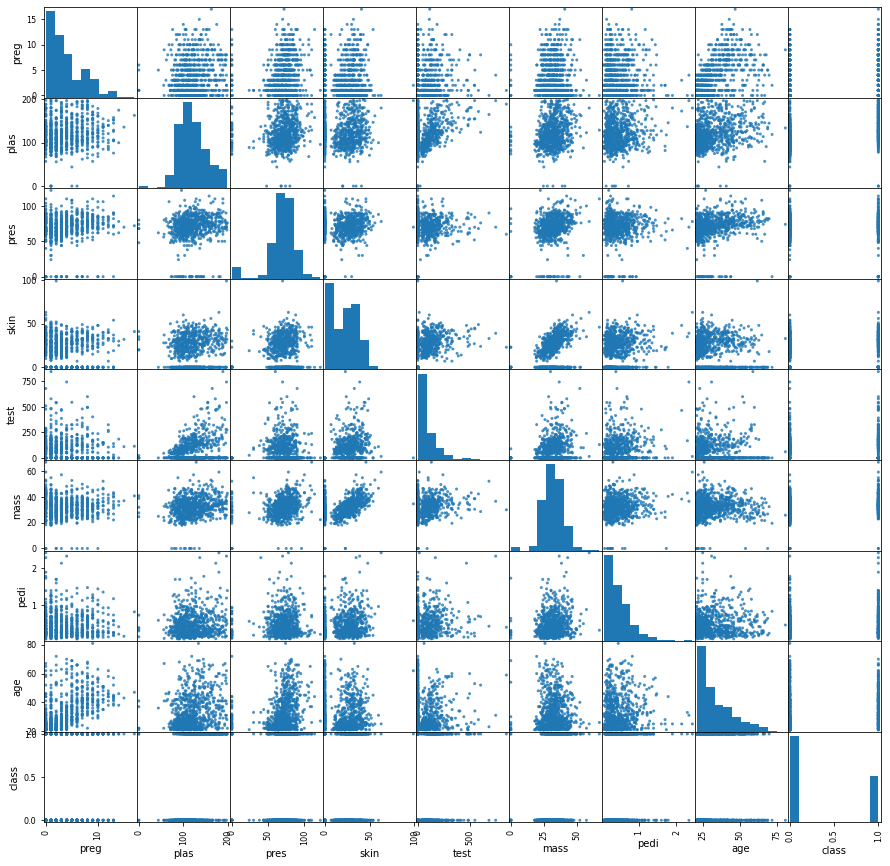

In [16]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
plt.show()

### Separate Dataset into Input & Output NumPy arrays

In [17]:
# store dataframe values into a numpy array
array = df.values

# Seperate array into input and output by slicing
X = array[:,0:8]

# For Y
Y = array[:,8]

### Split Input/Output Arrays into Training/Testing Datasets

In [18]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%

test_size = 0.33

# Selection of records randomly seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)

### Encode Class Values - One Hot Coding

In [19]:
###covert integers to one-hot coding format

# Encode class values as integers
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

# one hot format
onehot_Y_train = np_utils.to_categorical(encoded_Y_train)

#Convert integers into one hot codeing
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)

# One Hot Coding format
onehot_Y_test = np_utils.to_categorical(encoded_Y_test)

### Build and Train the Model

In [20]:
# Design an MLP Model

# define a function to create baseline model

def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [21]:
# Creating the model
model = baseline_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
# Train the model

model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
514/514 [==============================] - 1s 1ms/step - loss: 1.8831 - accuracy: 0.5545
Epoch 2/150
514/514 [==============================] - 0s 219us/step - loss: 1.0035 - accuracy: 0.5953
Epoch 3/150
514/514 [==============================] - 0s 215us/step - loss: 0.8252 - accuracy: 0.6518
Epoch 4/150
514/514 [==============================] - 0s 221us/step - loss: 0.8227 - accuracy: 0.6440
Epoch 5/150
514/514 [==============================] - 0s 226us/step - loss: 0.7247 - accuracy: 0.6693
Epoch 6/150
514/514 [==============================] - 0s 221us/step - loss: 0.7399 - accuracy: 0.6595
Epoch 7/150
514/514 [==============================] - 0s 220us/step - loss: 0.6945 - accuracy: 0.6673
Epoch 8/150
514/514 [==============================] - 0s 231us/step - loss: 0.7318 - accuracy: 0.6693
Epoch 9/150
514/514 [==============================] - 0s 222us/step - loss: 0.7171

### Evaluate Model with K-Fold Cross Validation

In [23]:
# Create Keras Classifier 

evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [24]:
# Evaluate the model, 10-Fold Cross Validation

kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [25]:
# Evaluate the model
results = cross_val_score(evaluator, X_test, onehot_Y_test, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 9.4662 - accuracy: 0.3772
Epoch 2/200
228/228 [==============================] - 0s 479us/step - loss: 9.4083 - accuracy: 0.3640
Epoch 3/200
228/228 [==============================] - 0s 475us/step - loss: 9.3342 - accuracy: 0.3728
Epoch 4/200
228/228 [==============================] - 0s 476us/step - loss: 9.1539 - accuracy: 0.3728
Epoch 5/200
228/228 [==============================] - 0s 456us/step - loss: 8.8546 - accuracy: 0.3904
Epoch 6/200
228/228 [==============================] - 0s 442us/step - loss: 6.3536 - accuracy: 0.4386
Epoch 7/200
228/228 [==============================] - 0s 447us/step - loss: 2.2463 - accuracy: 0.6009
Epoch 8/200
228/228 [==============================] - 0s 458us/step - loss: 1.4133 - accuracy: 0.6579
Epoch 9/200
228/228 [==============================] - 0s 450us/step - loss: 1.3833 - accuracy: 0.6184
Epoch 10/200
228/228 [==============================] - 0s 451us/step - los

In [26]:
# Evaluate Using model.evaluate()

scores = model.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

254/254 [==============================] - 0s 908us/step

accuracy: 73.23%
